### Initial project set up.

In [1]:
# Install necessary dependencies and modules.
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
# Function to fetch data using yfinance
def fetch_yfinance_data(symbol):
    # Fetch the stock data for the given symbol
    stock_data = yf.download(symbol, start='2020-01-01', end='2022-12-31', progress=False)
    stock_data['Company'] = symbol  # Add a column for company name
    return stock_data.reset_index()  # Reset index to have 'Date' as a column


### Data fetching codes by industry: Telecom - Oil.

In [3]:
# Define oil stock symbols
oil_symbols = {
    'Exxon Mobile': 'XOM',
    'Chevron': 'CVX',
    'ConocoPhillips': 'COP'
}

# Fetch data for Exxon Mobile, Chevron, and ConocoPhillips for Oil Stocks Analysis
oil_stock_data = {}
for company, oil_symbol in oil_symbols.items():
    oil_stock_data[company] = fetch_yfinance_data(oil_symbol)


In [4]:
# Define telecom stock symbols
tele_symbols = {
    'AT&T': 'T',
    'T-Mobile': 'TMUS',
    'Verizon': 'VZ'
}

# Fetch data for AT&T, T-Mobile, and Verizon for Telecom Stock Analysis
tele_stock_data = {}
for company, tele_symbol in tele_symbols.items():
    tele_stock_data[company] = fetch_yfinance_data(tele_symbol)

### Data Cleaning and Organization.

In [5]:
# Convert the Tele Date column to datetime format
tele_stock_data = {company: tele_stock_data[company].copy() for company in tele_stock_data}  # Ensure we work with a copy

for company in tele_stock_data:
    tele_stock_data[company]['Date'] = pd.to_datetime(tele_stock_data[company]['Date'])

# Combine the individual company DataFrames into a single DataFrame for cleaning
combined_tele_data = pd.concat(tele_stock_data.values(), ignore_index=True)

# Sort the data by Company and Date
combined_tele_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_tele_data.ffill(inplace=True)  # Forward fill
combined_tele_data.bfill(inplace=True)  # Backward fill

# Filter the data to include only dates from 2021-01-01 to 2022-01-01
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2022-01-01')
filtered_tele_data = combined_tele_data[(combined_tele_data['Date'] >= start_date) & (combined_tele_data['Date'] <= end_date)].copy()

# Extract year and quarter
filtered_tele_data['Year'] = filtered_tele_data['Date'].dt.year
filtered_tele_data['Quarter'] = filtered_tele_data['Date'].dt.to_period('Q')

# Define the mapping of symbols to full company names
company_name_mapping = {
     'T': 'AT&T',
    'TMUS': 'T-Mobile',
    'VZ': 'Verizon'
}

# Assuming 'filtered_oil_data' is already available, we'll map the company names accordingly
filtered_tele_data['Company'] = filtered_tele_data['Company'].map(company_name_mapping)

# Save the cleaned and filtered Telecom data to a CSV file
filtered_tele_data.to_csv('outputs/filtered_tele_data.csv', index=False)

# Output to check if data is cleaned properly
print(filtered_tele_data.head())



          Date       Open       High        Low      Close  Adj Close  \
253 2021-01-04  22.197886  22.273415  21.918428  22.235649  16.811523   
254 2021-01-05  22.280968  22.469790  22.046827  22.099697  16.708733   
255 2021-01-06  22.212992  22.658609  22.182779  22.530210  17.034229   
256 2021-01-07  22.673716  22.726585  22.416918  22.590633  17.079912   
257 2021-01-08  22.009064  22.061934  21.714502  21.918428  16.962122   

       Volume Company  Year Quarter  
253  86700816    AT&T  2021  2021Q1  
254  83054520    AT&T  2021  2021Q1  
255  73455520    AT&T  2021  2021Q1  
256  71265359    AT&T  2021  2021Q1  
257  72471656    AT&T  2021  2021Q1  


In [6]:
# Convert the Oil Date column to datetime format
oil_stock_data = {company: oil_stock_data[company].copy() for company in oil_stock_data}  # Ensure we work with a copy

for company in oil_stock_data:
    oil_stock_data[company]['Date'] = pd.to_datetime(oil_stock_data[company]['Date'])

# Combine the individual company DataFrames into a single DataFrame for cleaning
combined_oil_data = pd.concat(oil_stock_data.values(), ignore_index=True)

# Sort the data by Company and Date
combined_oil_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_oil_data.ffill(inplace=True)  # Forward fill
combined_oil_data.bfill(inplace=True)  # Backward fill

# Filter the data to include only dates from 2020-01-01 to 2022-01-01
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2022-01-01')
filtered_oil_data = combined_oil_data[(combined_oil_data['Date'] >= start_date) & (combined_oil_data['Date'] <= end_date)].copy()

# Extract year and quarter
filtered_oil_data['Year'] = filtered_oil_data['Date'].dt.year
filtered_oil_data['Quarter'] = filtered_oil_data['Date'].dt.to_period('Q')

# Define the mapping of symbols to full company names
company_name_mapping = {
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips'
}

# Assuming 'filtered_oil_data' is already available, we'll map the company names accordingly
filtered_oil_data['Company'] = filtered_oil_data['Company'].map(company_name_mapping)

# Save the cleaned and filtered Oil data to a CSV file
filtered_oil_data.to_csv('outputs/filtered_oil_data.csv', index=False)

# Output to check if data is cleaned properly
print(filtered_oil_data.head())


           Date       Open       High        Low      Close  Adj Close  \
1765 2021-01-04  40.500000  40.650002  39.180000  39.570000  34.432667   
1766 2021-01-05  40.240002  42.869999  40.000000  41.840000  36.407963   
1767 2021-01-06  42.529999  43.950001  41.919998  43.509998  37.861134   
1768 2021-01-07  44.049999  44.990002  43.599998  44.700001  38.896652   
1769 2021-01-08  45.000000  45.480000  44.189999  44.700001  38.896652   

        Volume         Company  Year Quarter  
1765   8597600  ConocoPhillips  2021  2021Q1  
1766  12393600  ConocoPhillips  2021  2021Q1  
1767  11035300  ConocoPhillips  2021  2021Q1  
1768   9648200  ConocoPhillips  2021  2021Q1  
1769   9448700  ConocoPhillips  2021  2021Q1  


### Stock Analysis.

### Percentage Change calculation: Measures the growth or decline in stock prices over a period, helping to identify trends and compare performance across different time frames.

C:\Users\cassi\AppData\Local\Temp\ipykernel_29368\1523246428.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_oil_percentage_change = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(


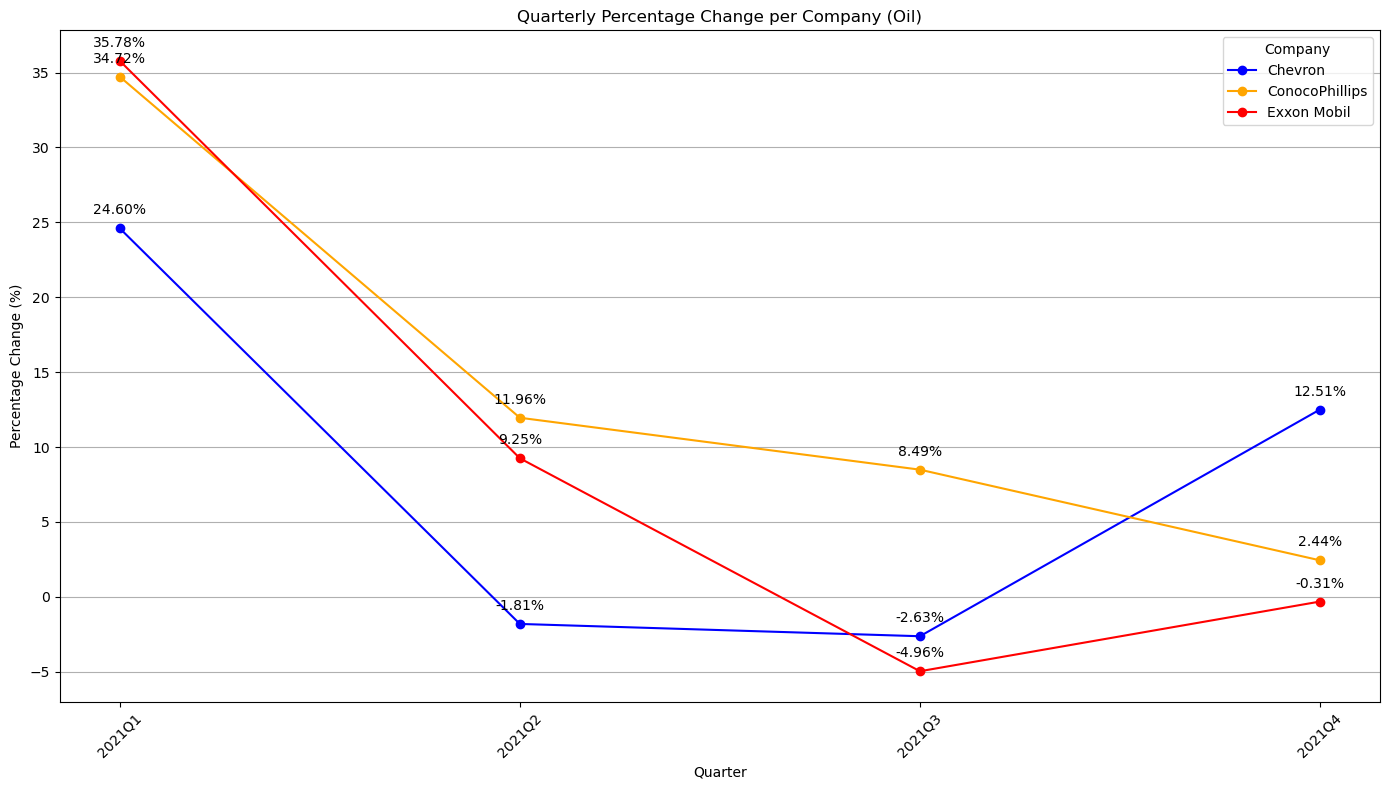

In [7]:
# Calculate the percentage change in Oil Stock for each quarter
quarterly_oil_percentage_change = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string for plotting purposes
quarterly_oil_percentage_change['Quarter'] = quarterly_oil_percentage_change['Quarter'].astype(str)

# Define the colors for each company using the stock symbols instead of full company names
oil_colors = {'Exxon Mobil': 'Red', 'Chevron': 'Blue', 'ConocoPhillips': 'Orange'}

# Plot the quarterly percentage change
plt.figure(figsize=(14, 8))

for company in quarterly_oil_percentage_change['Company'].unique():
    company_data = quarterly_oil_percentage_change[quarterly_oil_percentage_change['Company'] == company]
    
    # Ensure the symbol matches the color dictionary key
    plt.plot(company_data['Quarter'], company_data['Percentage Change'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each percentage change by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change']:.2f}%", 
                     (row['Quarter'], row['Percentage Change']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Percentage Change per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')  # Add grid lines on the y-axis for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits properly
plt.savefig('outputs/oil_stock_change.png')
plt.show()



C:\Users\cassi\AppData\Local\Temp\ipykernel_29368\2264034523.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_tele_percentage_change = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(


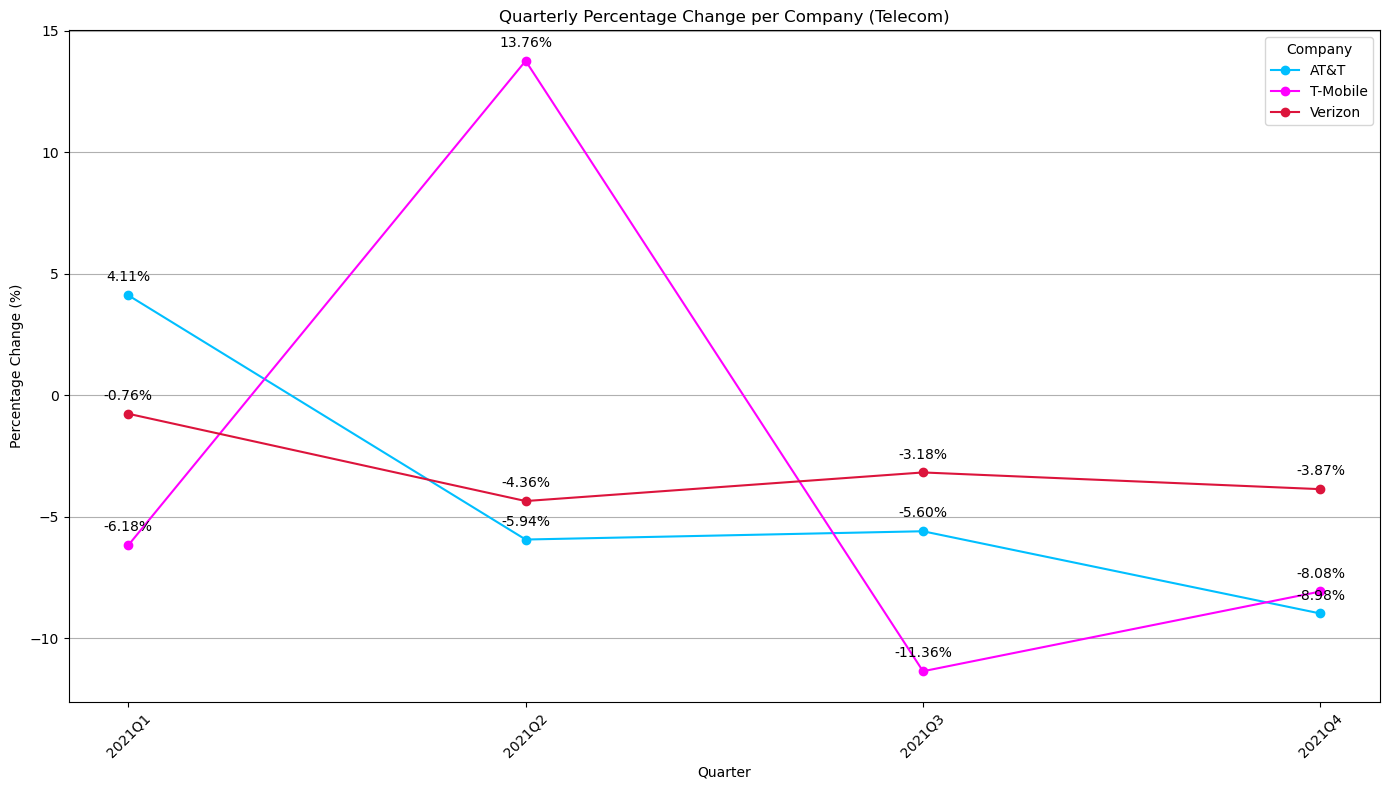

In [8]:
# Calculate the percentage change in Telecom Stock for each quarter
quarterly_tele_percentage_change = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string for proper formatting during plotting
quarterly_tele_percentage_change['Quarter'] = quarterly_tele_percentage_change['Quarter'].astype(str)

# Define the colors using the stock symbols as keys
tele_colors = {'AT&T': 'Deepskyblue', 'T-Mobile': 'Fuchsia', 'Verizon': 'Crimson'}

# Plot the quarterly percentage change
plt.figure(figsize=(14, 8))

for company in quarterly_tele_percentage_change['Company'].unique():
    company_data = quarterly_tele_percentage_change[quarterly_tele_percentage_change['Company'] == company]
    
    # Ensure the symbol matches the color dictionary key
    plt.plot(company_data['Quarter'], company_data['Percentage Change'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each percentage change by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change']:.2f}%", 
                     (row['Quarter'], row['Percentage Change']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Percentage Change per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.tight_layout()  # Ensure the plot fits well
plt.savefig('outputs/telecom_stock_change.png')  # Save the plot as PNG
plt.show()


### Stock Volume Change: Indicates the trading activity and liquidity of a stock, reflecting investor interest and potential price movements.

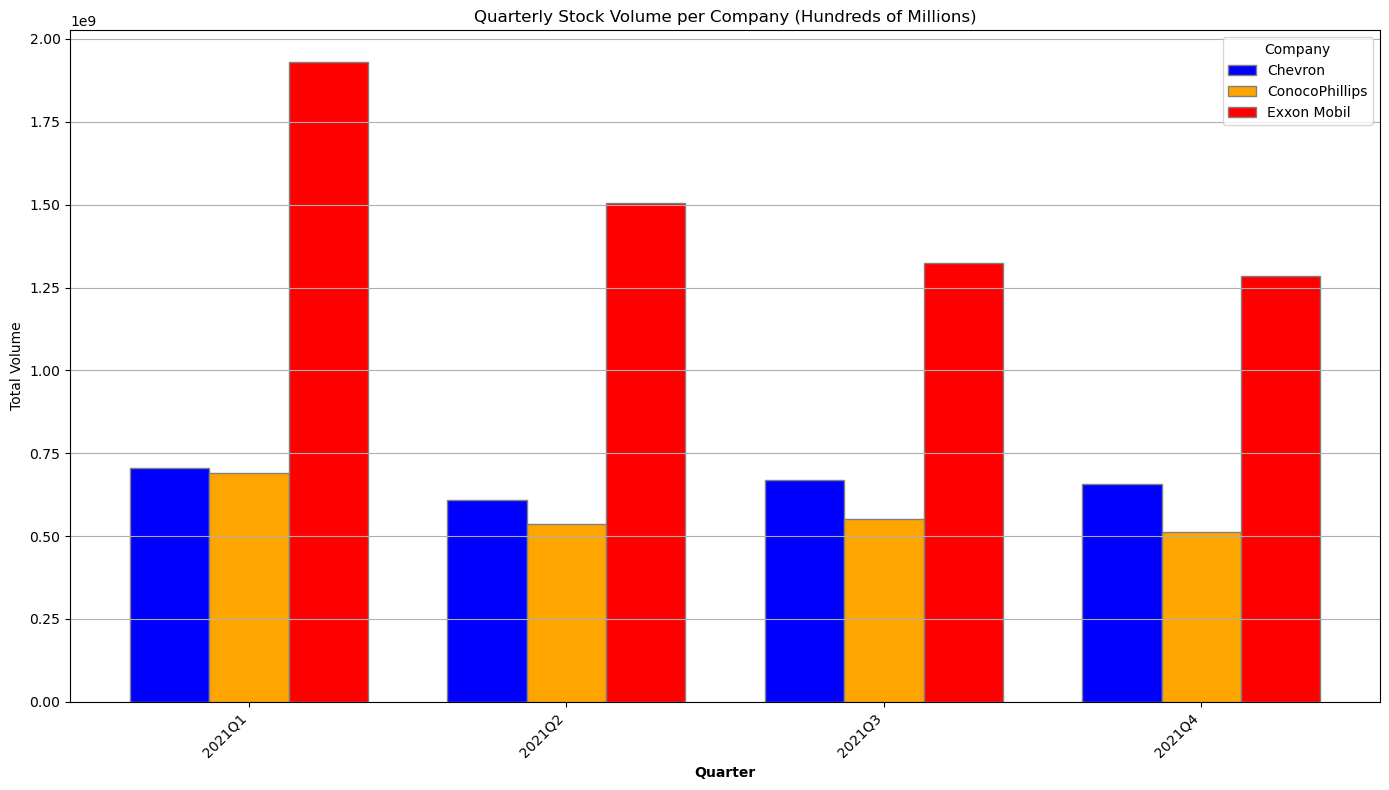

In [9]:
# Calculate the quarterly Oil Stock Volume change per quarter.
quarterly_oil_volume = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting due to possible errors.
quarterly_oil_volume['Quarter'] = quarterly_oil_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_oil_volume['Quarter'].unique()
unique_companies = quarterly_oil_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_oil_volume[quarterly_oil_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=oil_colors[company])

# Plot visual formatting.
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_stock_volume.png')
plt.show()


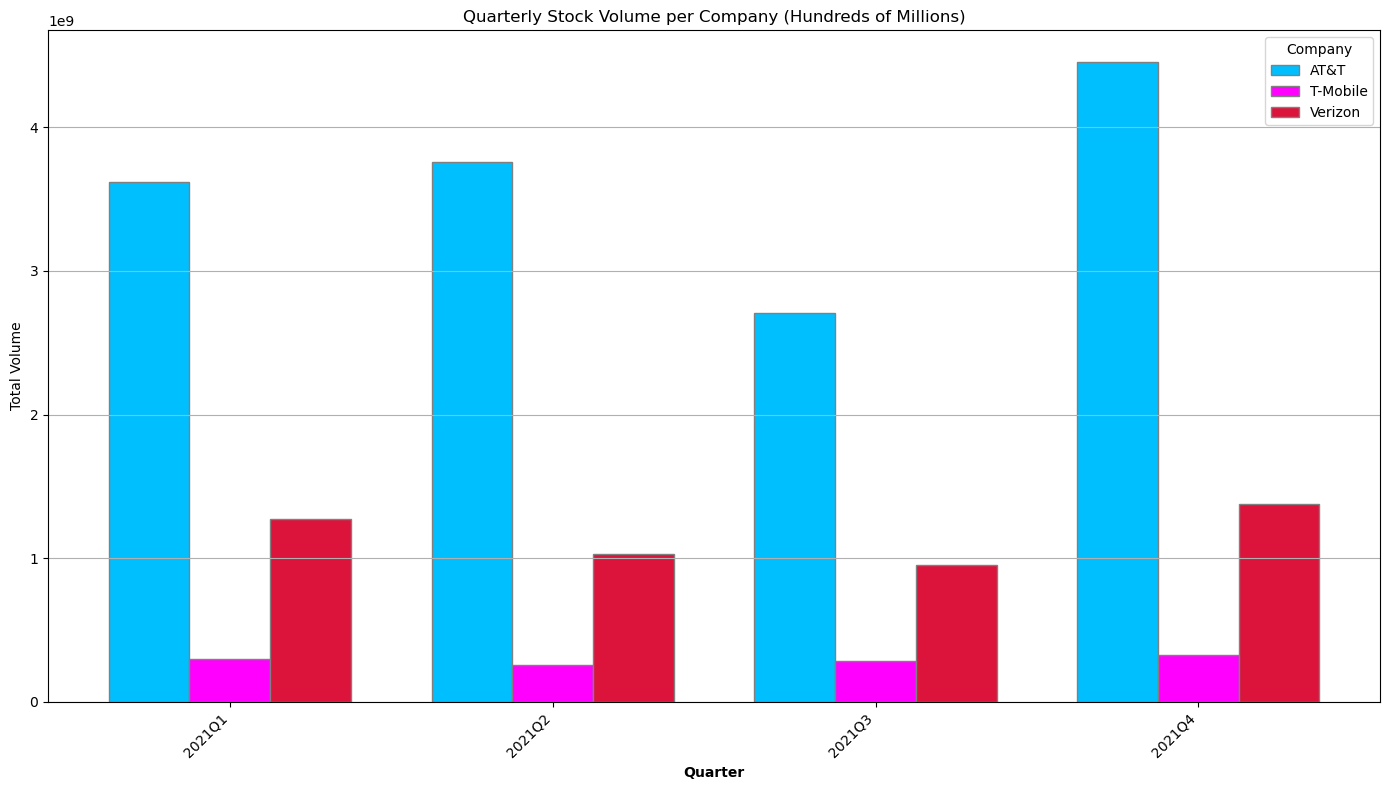

In [10]:
# Calculate the quarterly Telecom Stock Volume change per quarter
quarterly_tele_volume = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting
quarterly_tele_volume['Quarter'] = quarterly_tele_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_tele_volume['Quarter'].unique()
unique_companies = quarterly_tele_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_tele_volume[quarterly_tele_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=tele_colors[company])

# Plot visual formatting
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/tele_stock_volume.png')
plt.show()


### Standard Deviation (Volatility): Assesses the risk associated with a stock by measuring the variability of its returns, aiding in risk management and investment decisions.

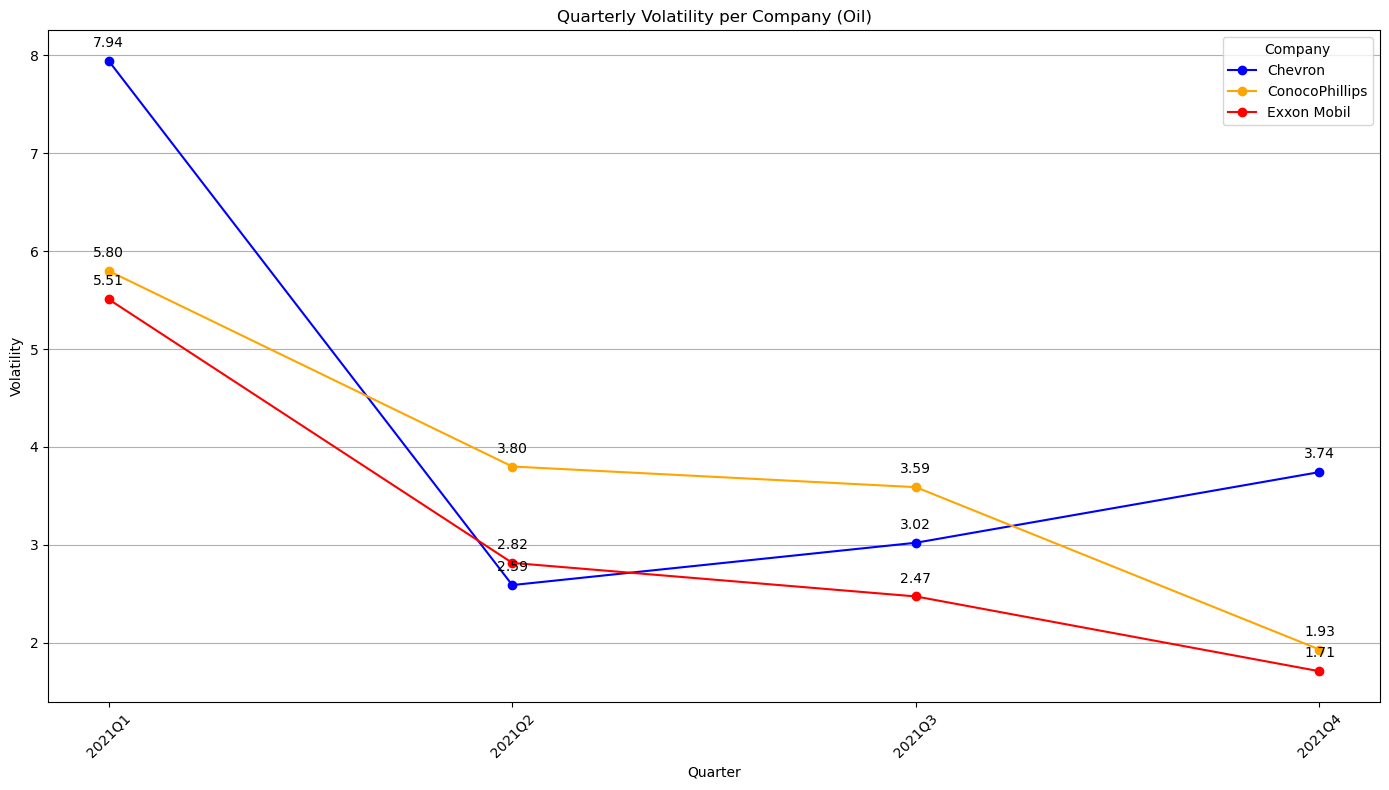

,Company,Quarter,Volatility
0,Chevron,2021Q1,7.943149
1,Chevron,2021Q2,2.588803
2,Chevron,2021Q3,3.021084
3,Chevron,2021Q4,3.742836
4,ConocoPhillips,2021Q1,5.797776
5,ConocoPhillips,2021Q2,3.799867
6,ConocoPhillips,2021Q3,3.588901
7,ConocoPhillips,2021Q4,1.930463
8,Exxon Mobil,2021Q1,5.507866
9,Exxon Mobil,2021Q2,2.815312


In [11]:
# Calculate the standard deviation (volatility) in oil Stock for each quarter
quarterly_oil_volatility = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_oil_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_oil_volatility['Quarter'] = quarterly_oil_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_oil_volatility['Company'].unique():
    company_data = quarterly_oil_volatility[quarterly_oil_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_volatility.png')
plt.show()

# Output the quarterly oil volatility data
quarterly_oil_volatility


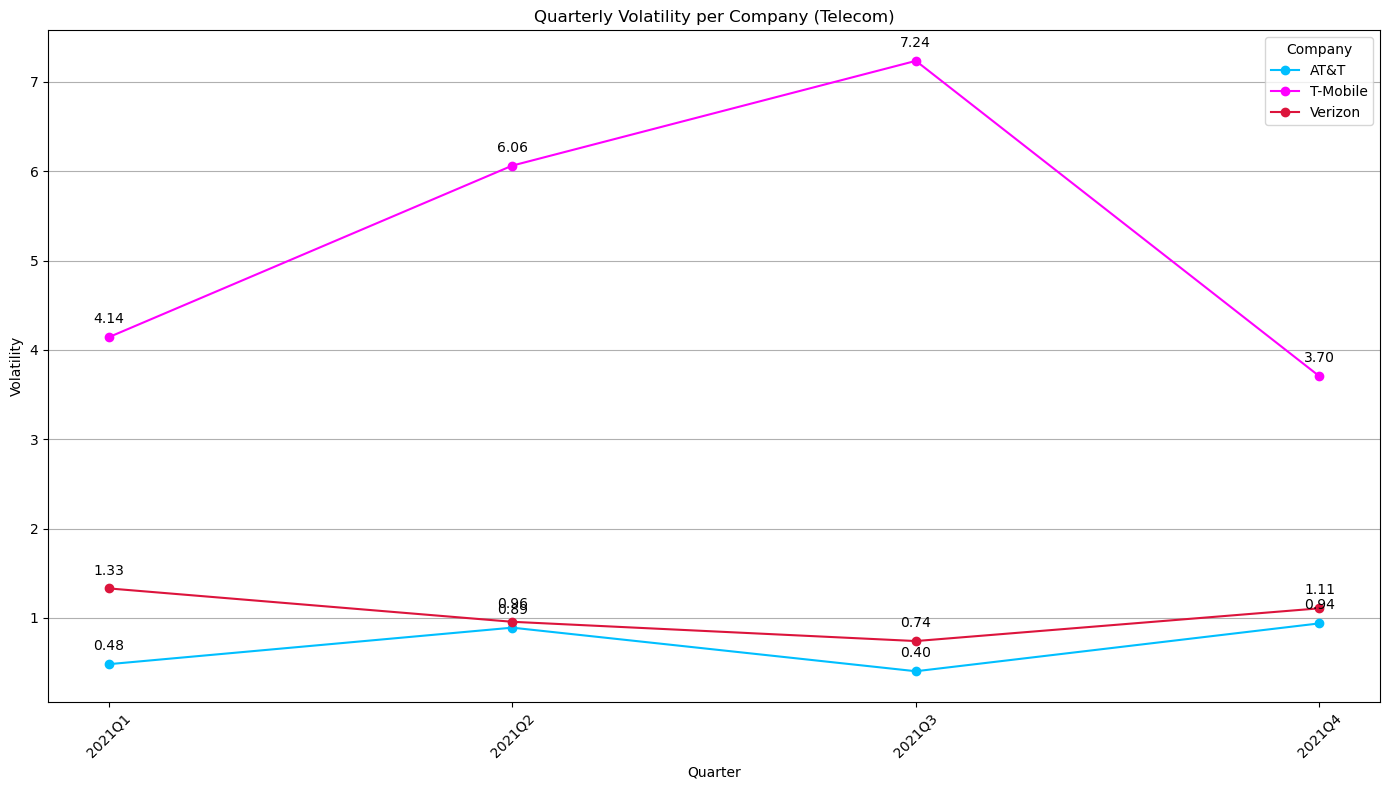

,Company,Quarter,Volatility
0,AT&T,2021Q1,0.481606
1,AT&T,2021Q2,0.890464
2,AT&T,2021Q3,0.402678
3,AT&T,2021Q4,0.938528
4,T-Mobile,2021Q1,4.141775
5,T-Mobile,2021Q2,6.063111
6,T-Mobile,2021Q3,7.235863
7,T-Mobile,2021Q4,3.704424
8,Verizon,2021Q1,1.329955
9,Verizon,2021Q2,0.956256


In [12]:
# Calculate the standard deviation (volatility) in telecom Stock for each quarter
quarterly_tele_volatility = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_tele_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_tele_volatility['Quarter'] = quarterly_tele_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_tele_volatility['Company'].unique():
    company_data = quarterly_tele_volatility[quarterly_tele_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/telecom_volatility.png')
plt.show()

# Output the quarterly telecom volatility data
quarterly_tele_volatility


### Return on Investment (ROI): Evaluates the profitability of an investment, enabling investors to gauge the efficiency of their investment choices and compare different investment opportunities.

C:\Users\cassi\AppData\Local\Temp\ipykernel_29368\3359970542.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_oil_roi = filtered_oil_data.groupby(['Company', 'Quarter']).apply(oil_roi).reset_index()
C:\Users\cassi\AppData\Local\Temp\ipykernel_29368\3359970542.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  quarterly_oil_roi = pd.concat([initial_investment, quarterly_oil_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

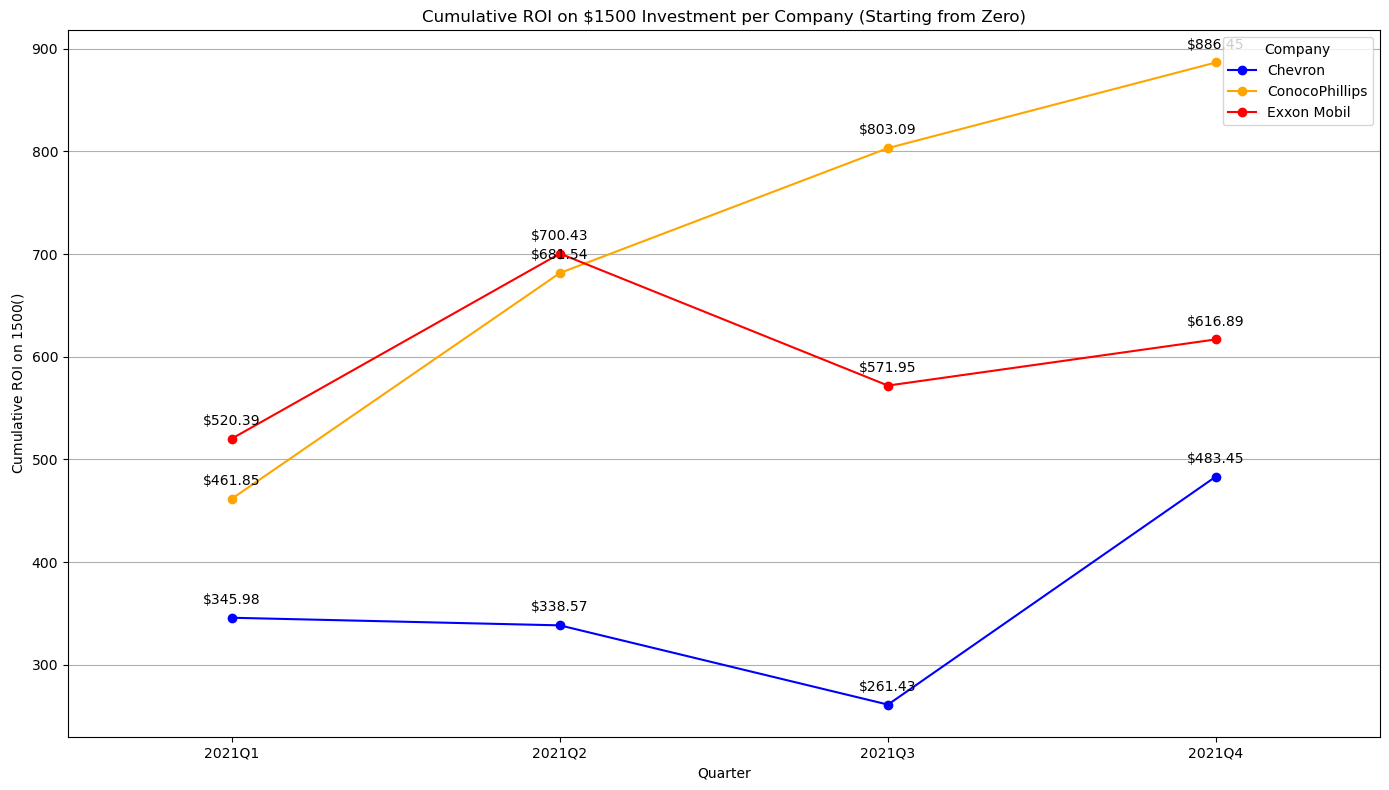

In [13]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices = filtered_oil_data[filtered_oil_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the Oil Stocks Data
def oil_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500
    })

# Apply the ROI calculation to each company for each quarter
quarterly_oil_roi = filtered_oil_data.groupby(['Company', 'Quarter']).apply(oil_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = pd.DataFrame({
    'Company': initial_prices.index,
    'Quarter': '0',
    'Quarter ROI (%)': 0,
    'ROI on $1500 ($)': 0,
    'Cumulative ROI on $1500 ($)': 0
})

# Ensure that the cumulative ROI starts from zero for each company
quarterly_oil_roi['Cumulative ROI on $1500 ($)'] = quarterly_oil_roi.groupby('Company')['ROI on $1500 ($)'].cumsum()
quarterly_oil_roi = pd.concat([initial_investment, quarterly_oil_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
quarterly_oil_roi['Quarter'] = quarterly_oil_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
quarterly_oil_roi = quarterly_oil_roi[quarterly_oil_roi['Quarter'] != '0']

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in quarterly_oil_roi['Company'].unique():
    company_data = quarterly_oil_roi[quarterly_oil_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=oil_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        if company == 'Chevron' and row['Quarter'] == '2020Q1':
            plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                         xytext=(0, -15), ha='center')  # Lower the annotation for Chevron in Q1
        else:
            plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                         xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(quarterly_oil_roi['Quarter'].unique()))
xticks_labels = quarterly_oil_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/oil_roi.png')
plt.show()


C:\Users\cassi\AppData\Local\Temp\ipykernel_29368\96185214.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_tele_roi = filtered_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()
C:\Users\cassi\AppData\Local\Temp\ipykernel_29368\96185214.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  quarterly_tele_roi = pd.concat([initial_investment, quarterly_tele_roi], ignore_index=True).sort_values(by=['Company', 'Quarter']

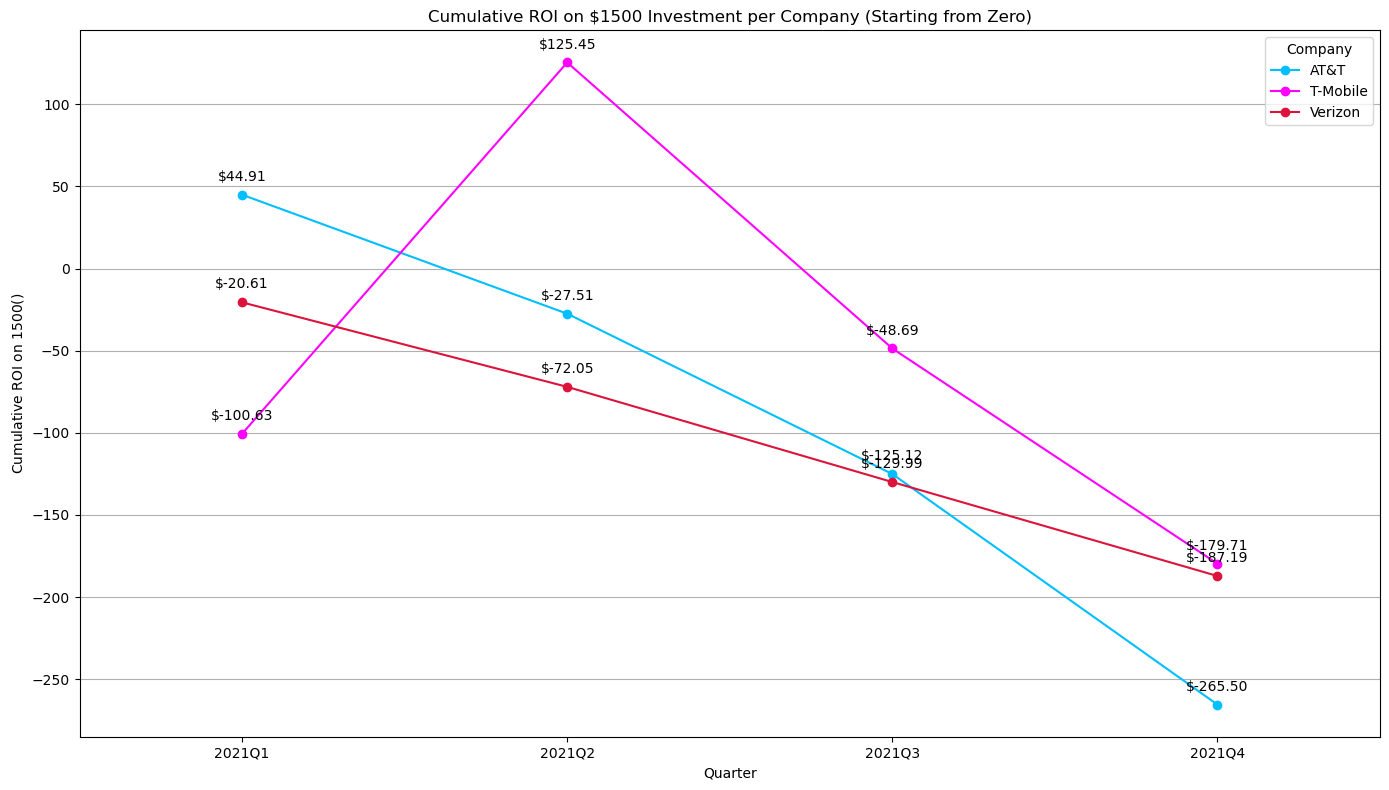

In [14]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices_tele = filtered_tele_data[filtered_tele_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the telecom Stocks Data
def tele_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500
    })

# Apply the ROI calculation to each company for each quarter
quarterly_tele_roi = filtered_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = pd.DataFrame({
    'Company': initial_prices_tele.index,
    'Quarter': '0',
    'Quarter ROI (%)': 0,
    'ROI on $1500 ($)': 0,
    'Cumulative ROI on $1500 ($)': 0
})

# Ensure that the cumulative ROI starts from zero for each company
quarterly_tele_roi['Cumulative ROI on $1500 ($)'] = quarterly_tele_roi.groupby('Company')['ROI on $1500 ($)'].cumsum()
quarterly_tele_roi = pd.concat([initial_investment, quarterly_tele_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
quarterly_tele_roi['Quarter'] = quarterly_tele_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
quarterly_tele_roi = quarterly_tele_roi[quarterly_tele_roi['Quarter'] != '0']

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in quarterly_tele_roi['Company'].unique():
    company_data = quarterly_tele_roi[quarterly_tele_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=tele_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                     xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(quarterly_tele_roi['Quarter'].unique()))
xticks_labels = quarterly_tele_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/tele_roi.png')
plt.show()
